In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme()

In [2]:
crimes = pd.read_csv("./data/crimes_exam_data.csv")


### Question 1: <a class="tocSkip">

- How many rows are there in the table?
- How many variables?
- Which variable has the most missing data?

After answering this question **make sure to remove all rows containing missing data** from the table before proceeding to the next question.

**Answer:**


In [4]:
num_rows, num_columns = crimes.shape
print(f"Hay {num_rows} observaciones y {num_columns} variables en la tabla")

Hay 2215 observaciones y 23 variables en la tabla


In [5]:
crimes.isna().sum()

communityname            0
state                    0
population               0
householdsize            0
agePct12t21              0
agePct12t29              0
agePct16t24              0
agePct65up               0
pctUrban                 0
medIncome                0
PctPopUnderPov           0
PopDens                  0
LemasPctOfficDrugUn      0
murdPerPop               0
rapesPerPop            208
robbbPerPop              1
assaultPerPop           13
burglPerPop              3
larcPerPop               3
autoTheftPerPop          3
arsonsPerPop            91
ViolentCrimesPerPop    221
nonViolPerPop           97
dtype: int64

The variable 'ViolentCrimesPerPop' has the most missing data


In [6]:
crimes.dropna(inplace=True)

### Question 2: <a class="tocSkip">

- Show the variables in the data set and their types. If there are categorical variables identify them and convert them to that type.

**Answer:**


In [7]:
crimes.dtypes

communityname           object
state                   object
population               int64
householdsize          float64
agePct12t21            float64
agePct12t29            float64
agePct16t24            float64
agePct65up             float64
pctUrban               float64
medIncome                int64
PctPopUnderPov         float64
PopDens                float64
LemasPctOfficDrugUn    float64
murdPerPop             float64
rapesPerPop            float64
robbbPerPop            float64
assaultPerPop          float64
burglPerPop            float64
larcPerPop             float64
autoTheftPerPop        float64
arsonsPerPop           float64
ViolentCrimesPerPop    float64
nonViolPerPop          float64
dtype: object

In [8]:
pd.set_option("display.max_columns", None)
crimes.head()

,communityname,state,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,pctUrban,medIncome,PctPopUnderPov,PopDens,LemasPctOfficDrugUn,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,11980,3.10,12.47,21.44,10.93,11.33,100.0,75122,1.96,1845.9,0.0,0.00,0.00,8.20,32.81,114.85,1132.08,131.26,16.41,41.02,1394.59
1,Marpletownship,PA,23123,2.82,11.01,21.30,10.48,17.18,100.0,47917,3.98,2186.7,0.0,0.00,4.25,21.26,102.05,242.37,1598.78,110.55,4.25,127.56,1955.95
2,Tigardcity,OR,29344,2.43,11.36,25.88,11.01,10.28,100.0,35669,4.75,2780.9,0.0,8.30,16.60,154.95,38.74,758.14,4972.19,376.30,60.87,218.59,6167.51
5,Springfieldcity,MO,140494,2.45,18.09,32.89,20.04,13.26,100.0,21577,17.78,1995.7,0.0,4.63,50.98,90.05,297.29,1386.46,5091.64,300.60,88.72,442.95,6867.42
6,Norwoodtown,MA,28700,2.60,11.17,27.41,12.76,14.42,100.0,42805,4.01,2643.5,0.0,0.00,13.53,30.44,182.66,372.09,974.19,487.10,57.50,226.63,1890.88


In [9]:
crimes[["communityname", "state"]] = crimes[["communityname", "state"]].astype(
    "category"
)


### Question 3: <a class="tocSkip">

- For the variables

```
'population', 'householdsize', 'pctUrban', 'medIncome', 'PctPopUnderPov', 'PopDens'
```

(copy and paste them!) do a basic numeric summary that contains their mean, median, quartiles, sd and range (min and max).  
 _Hint:_ you can do this in a single table for all those variables.

- Make a _pairplot_ for all these variables.

**Answer:**


In [11]:
df = crimes[
    [
        "population",
        "householdsize",
        "pctUrban",
        "medIncome",
        "PctPopUnderPov",
        "PopDens",
    ]
].copy()
df.describe()


,population,householdsize,pctUrban,medIncome,PctPopUnderPov,PopDens
count,1.902000e+03,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000
mean,5.248226e+04,2.712077,69.960931,33947.199790,11.674858,2803.496793
std,2.060649e+05,0.347385,44.270759,13497.931524,8.477675,2944.885801
min,1.000500e+04,1.600000,0.000000,12908.000000,0.640000,10.000000
25%,1.432350e+04,2.500000,0.000000,23702.750000,4.630000,1175.925000
50%,2.268100e+04,2.660000,100.000000,31268.000000,9.425000,2000.700000
75%,4.324975e+04,2.860000,100.000000,41484.750000,17.040000,3277.375000
max,7.322564e+06,5.280000,100.000000,123625.000000,48.820000,44229.900000


/home/perezs/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


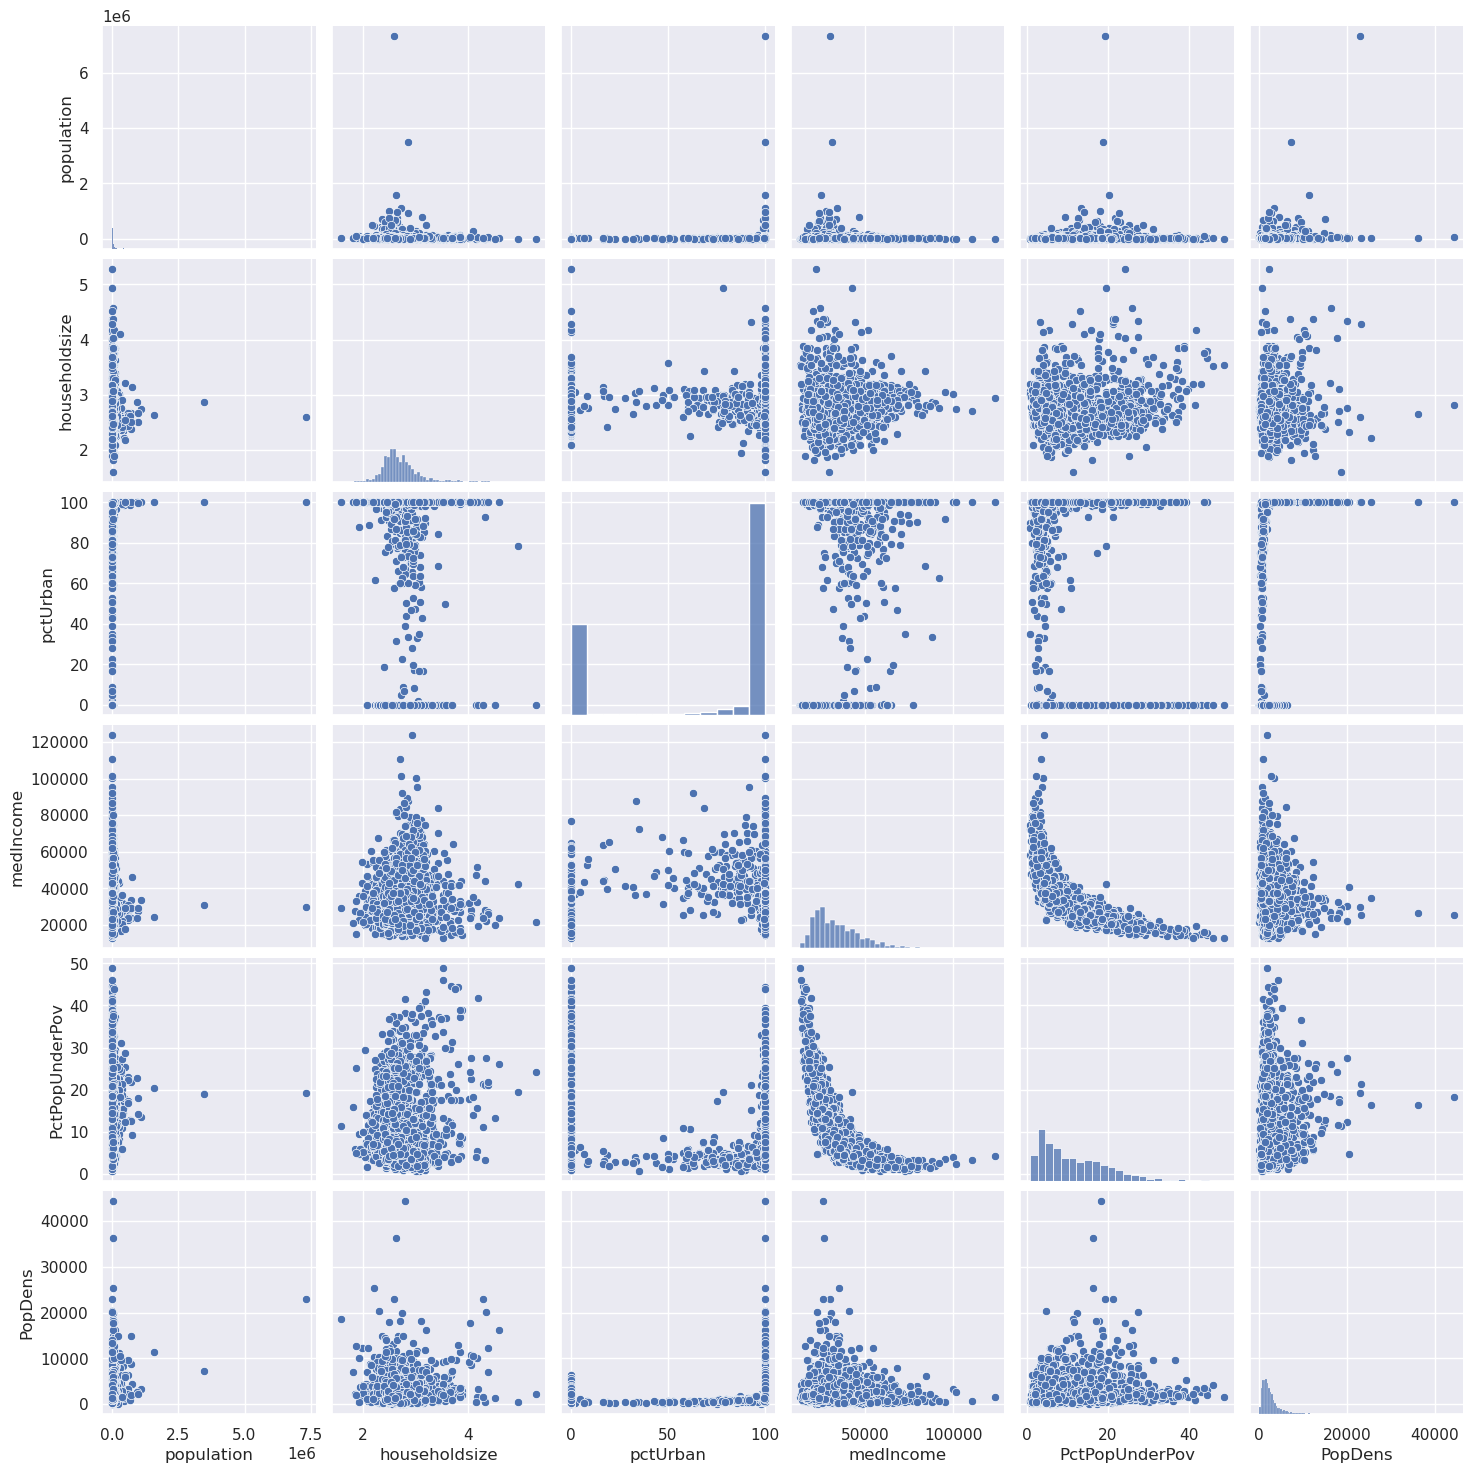

In [12]:
sns.pairplot(data=df)

### Question 4:

- Create a new column called `houseSize` dividing (binning) `householdSize` in 8 levels, from 1 to 5.5 in increments of 0.5:  
   $\qquad\qquad\qquad\qquad\qquad (1, 1.5],\quad (1.5, 2],\,\ldots\,, (4.5, 5],\quad (5, 5.5]$

- Make a _frequencies table_ for `houseSize` containing the absolute and relative frequencies (in the same table).

**Answer:**


In [18]:
bins = np.linspace(1, 5.5, 10)
bins


array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])

In [22]:
crimes["houseSize"] = pd.cut(crimes["householdsize"], bins=bins)


In [23]:
crimes[["houseSize", "householdsize"]].head()


,houseSize,householdsize
0,"(3.0, 3.5]",3.10
1,"(2.5, 3.0]",2.82
2,"(2.0, 2.5]",2.43
5,"(2.0, 2.5]",2.45
6,"(2.5, 3.0]",2.60


In [35]:
frequencies_table = (
    crimes["houseSize"].value_counts().to_frame(name="absolute_frequency")
)
frequencies_table["relative_frequency"] = crimes["houseSize"].value_counts(
    normalize=True
)
frequencies_table


,absolute_frequency,relative_frequency
houseSize,,
"(2.5, 3.0]",1134,0.596215
"(2.0, 2.5]",482,0.253417
"(3.0, 3.5]",209,0.109884
"(3.5, 4.0]",44,0.023134
"(4.0, 4.5]",17,0.008938
"(1.5, 2.0]",12,0.006309
"(4.5, 5.0]",3,0.001577
"(5.0, 5.5]",1,0.000526
"(1.0, 1.5]",0,0.000000


- Looking at the pair plot observe the distribution of `pctUrban`. Find the number of communities that are _not purely urban but also not purely rural_. That is, find the number of rows of the table where `pctUrban` is _simultaneously_ bigger than 10 and smaller than 90. **Discard these rows from the table, but keep the name `crimes` for the resulting table.**
- **After doing that** create another column called `isUrban` with value `True` if `pctUrban` $\geq 90$ and value `False` otherwise. Create a relative frequency table for `isUrban`.


In [53]:
((crimes["pctUrban"] > 10) & (crimes["pctUrban"] < 90)).mean() * len(crimes)


0.0

In [54]:
condition = (crimes["pctUrban"] > 10) & (crimes["pctUrban"] < 90)
crimes = crimes[-condition]
condition.mean()

0.0

In [57]:
crimes["isUrban"] = crimes["pctUrban"] >= 90
crimes["isUrban"].value_counts(normalize=True).to_frame(name="relFreq")

,relFreq
isUrban,
True,0.701299
False,0.298701


### Question 5:

- Make a plot showing (in the same plot) a histogram and density curve for `householdSize`. For the histogram make sure to use the same bins that you used for creating `houseSize`


<Axes: xlabel='householdsize', ylabel='Count'>

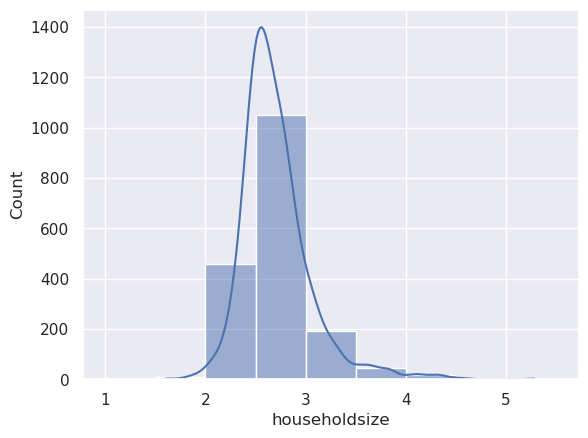

In [60]:
sns.histplot(data=crimes, x="householdsize", kde=True, bins=bins)

- Make a boxplot of `medIncome`. How many outliers are there? What community corresponds to the first (smallest) and last outliers (use the `comunityname` variable to find out their names).


<Axes: ylabel='medIncome'>

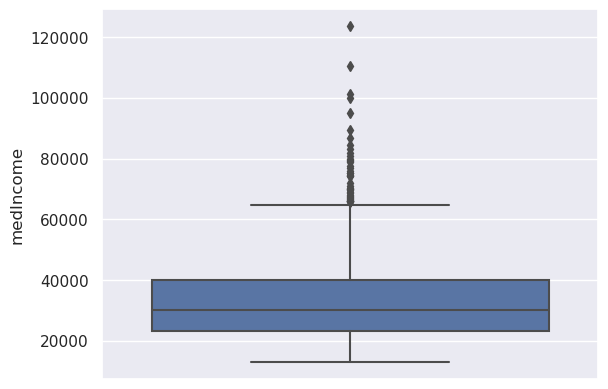

In [64]:
sns.boxplot(data=crimes, y="medIncome")

In [101]:
iqr = (
    crimes["medIncome"].describe().loc["75%"]
    - crimes["medIncome"].describe().loc["25%"]
)
upper_limit = crimes["medIncome"].describe().loc["75%"] + 1.5 * iqr
outliers = crimes[crimes["medIncome"] >= upper_limit]["medIncome"]

indexes_outliers = outliers.sort_values().index.tolist()
index_min_outlier, index_max_outlier = indexes_outliers[1], indexes_outliers[-1]
max_outlier, min_outlier = (
    crimes["communityname"].loc[index_max_outlier],
    crimes["communityname"].loc[index_min_outlier],
)

print(
    f"The min and max outliers are {min_outlier}, and {max_outlier}, respectively.")


The min and max outliers are WestCaldwelltownship, and Hillsboroughtown, respectively.


### Question 6:

- Find the total population for each state, adding up the observations in the table corresponding to that state.


- Create a new data set containing only the data corresponding to the five most populated states. Call that new data set `crimesTop5`.


**Before going on:** make sure that you create a list called `top5names` with the names of the top 5 most populated states. For example, this could be

```
top5Names = ['DC', 'FL', 'PA', 'TX', 'FL']
```

(but it is not! you have to find the real one) Then, when you have created the list, run this code to remove the levels for the non top 5 states:

```
top5_cat = pd.CategoricalDtype(top5Names)
crimesTop5 = crimesTop5.copy()
crimesTop5['state'] = crimesTop5.state.astype(top5_cat)
```

- After doing that, and using the data in `crimesTop5`, find the median by state of `ViolentCrimesPerPop`. Also choose a good plot to visualize the (possible) relation between these two variables.  
  **Optional:** Make a graphic judgment: does this relation depend on the `isUrban` variable?

**Answer:**


In [128]:
total_population_per_state = crimes.groupby("state")["population"].sum()
top_5_names = total_population_per_state.sort_values(ascending=False).index.to_list()[
    :5
]
crimes_top_5 = crimes[crimes["state"].isin(top_5_names)]


In [130]:
top5_cat = pd.CategoricalDtype(top_5_names)
crimes_top_5 = crimes_top_5.copy()
crimes_top_5["state"] = crimes_top_5.state.astype(top5_cat)


In [180]:
median_violent_crimes = crimes_top_5.groupby("state", as_index=False)[
    "ViolentCrimesPerPop"
].median()
median_violent_crimes


,state,ViolentCrimesPerPop
0,CA,641.840
1,NY,426.710
2,TX,495.865
3,NJ,233.220
4,FL,965.520


<Axes: xlabel='state', ylabel='ViolentCrimesPerPop'>

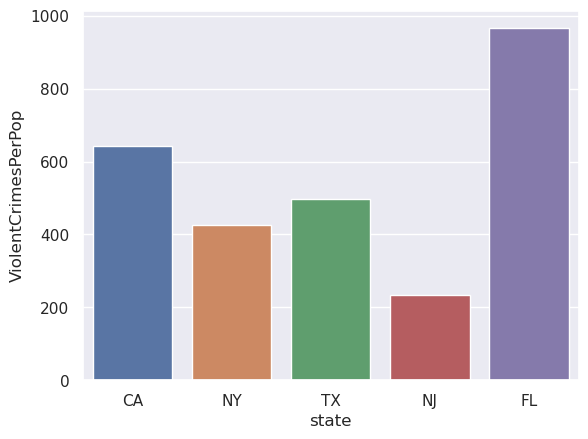

In [182]:
sns.barplot(data=median_violent_crimes, x="state", y="ViolentCrimesPerPop")


<Axes: xlabel='state', ylabel='ViolentCrimesPerPop'>

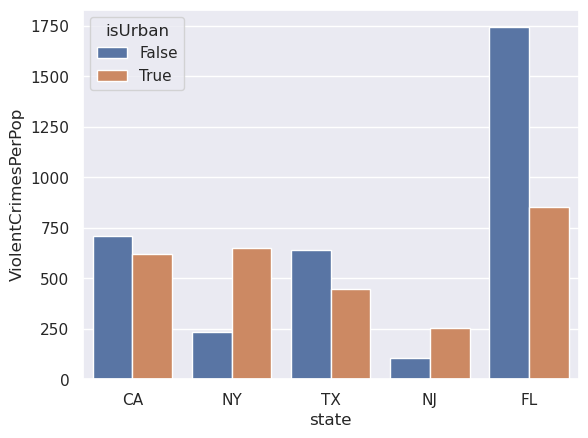

In [183]:
median_violent_crimes = crimes_top_5.groupby(["state", "isUrban"], as_index=False)[
    "ViolentCrimesPerPop"
].median()

sns.barplot(
    data=median_violent_crimes, x="state", y="ViolentCrimesPerPop", hue="isUrban"
)


### Question 7:

- If we randomly pick a community whose `PopDens` is _below-average_ (lower than the mean `PopDens` for all communities), find the probability `p` that its `robbbPerPop` value is less than 30.
- Using the previous result: suppose that we take a random sample (with replacement) of 15 _below-average_ `PopDens` communities. What is the **theoretical** probability that **5 or more** of them will have a `robbbPerPop` value less than 30.

- Check that result using a simulation where you take $N = 10000$ samples, each of them with 15 _below-average_ `PopDens` communities and find the relative frequency of the event: 5 or more of them have a `robbbPerPop` value less than 30.

**Answer:**


In [189]:
bellow_average_pop_density = crimes[crimes["PopDens"] < crimes["PopDens"].mean()]
(bellow_average_pop_density["robbbPerPop"] < 30).mean()

0.2767191383595692

In [232]:
from scipy.stats import binom

prob = (bellow_average_pop_density["robbbPerPop"] < 30).mean()
sample_size = 15
k = np.linspace(0, sample_size, sample_size + 1)

prob = 1 - binom.pmf(k, sample_size, prob).cumsum()[4]
round(prob, 4)

0.4041

In [243]:
sample_size = 15
num_of_samples = 10_000

population = bellow_average_pop_density["robbbPerPop"].to_numpy()
rng = np.random.default_rng(seed=0)
samples = rng.choice(a=population, size=(sample_size, num_of_samples))
samples = samples < 30
values, counts = np.unique(samples.sum(axis=0), return_counts=True)
rel_freq = counts / counts.sum()
prob = 1 - rel_freq.cumsum()[4]
round(prob, 4)


0.4048

### Question 8: <a class="tocSkip">

- Using the whole `crimes` data set. Find the two states with the lowest and highest median values for `PctPopUnderPov`. Then find the two 95% confidence intervals for the means of `assaultPerPop` for each of these two states. What is your conclussion?

**Answer:**


In [260]:
crimes.groupby("state", as_index=False)["PctPopUnderPov"].median().sort_values(
    by="PctPopUnderPov"
).reset_index().drop("index", axis=1).iloc[[0, -1]]


,state,PctPopUnderPov
0,CT,3.87
43,LA,26.17


In [267]:
def get_confidence_interval(sample, confidence_level=0.95, distribution="StudentsT"):
    """
    Given a one-variable size-m sample and the desired confidence level, returns the confidence interval of the mean.

    Args:
        sample : (numpy.ndarray Shape (m)) Sample
        confidence_level: (float in [0,1]) Probability that the mean of the population falls inside the confidence interval
        distribution: ("StudentsT" or "Normal") Use "StudentsT" for small samples, and "Normal" for big samples


    Returns:
        confidence_interval: (numpy.ndarray Shape (2)) The interval where the mean of the population falls, with a probability of p = confidence_level
        delta: (float): half-width of the interval

    """

    # Probability that the population mean falls outside the confidence interval
    alpha = 1 - confidence_level

    # Use the specified distribution to calculate the critical point
    if distribution == "StudentsT":
        degrees_of_freedom = sample.size - 1
        critical_point = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)
    elif distribution == "Normal":
        critical_point = stats.norm.ppf(1 - alpha / 2, loc=0, scale=1)
    else:
        raise ValueError("distribution must be either 'StudentsT' or 'Normal")

    # Calculate the half-width (delta) and the confidence interval
    delta = critical_point * sample.std() / np.sqrt([sample.size])
    confidence_interval = sample.mean() + np.array([-1, +1]) * delta

    return confidence_interval, delta


In [269]:
sample = crimes[crimes["state"] == "CT"]["assaultPerPop"].to_numpy()
confidence_interval, delta = get_confidence_interval(
    sample, confidence_level=0.95, distribution="StudentsT"
)
confidence_interval

array([ 93.72412202, 232.50876687])

In [270]:
sample = crimes[crimes["state"] == "LA"]["assaultPerPop"].to_numpy()
confidence_interval, delta = get_confidence_interval(
    sample, confidence_level=0.95, distribution="StudentsT"
)
confidence_interval

array([ 640.78942941, 1328.97899164])

### Question 9:

- Using the whole `crimes` data set. Find $\mu_0$, the mean of `autoTheftPerPop` for those communities where `pctUrban < 10` (equivalently, `isUrban` is `False`).
- Take a random sample (with replacement) of 30 communities with `pctUrban >= 90` (equivalently, `isUrban` is `True`) and use it to test (95% significance level) the **alternative hypothesis:** the mean `autoTheftPerPop` for urban communities is higher than $\mu_0$. Make sure to set `random_state=2022` in the pandas `sample` method (or the equivalent `random.seed` if you use NumPy) to ensure the reproducibility of the sample.
- **Optional:** consider the sample above as a _pilot study_. What sample size (number of communities) would you need to get 80% power in a test of the same hypothesis, if you want a precision $\delta = 50$ with significance level equal = 95%.

**Answer:**


In [285]:
mu_0 = crimes[crimes["isUrban"] == False]["autoTheftPerPop"].mean()
sample = crimes[crimes["isUrban"] == True].sample(30, replace=True, random_state=2022)[
    "autoTheftPerPop"
]

# Sample data
n = len(sample)  # Sample size
x_bar = sample.mean()  # Sample mean
s = sample.std()  # Sample standard deviation
mu0 = mu_0  # Mean for the null hypothesis

# Students T statistic
t_statistic = (x_bar - mu0) / (s / (n**0.5))
print(t_statistic)

# Degrees of freedom
df = n - 1

# p_value: probability of obtaining a value equal or smaller than x_bar
p_value = stats.t.cdf(t_statistic, df)

# The probability that we want to calculate is
prob = 1 - p_value

print(
    f"El p-valor para este contraste de hipótesis es aproximadamente: {round(prob, 4)}"
)

print(mu_0, x_bar)


4.055893574045485
El p-valor para este contraste de hipótesis es aproximadamente: 0.0002
282.06245746691866 671.4750000000001


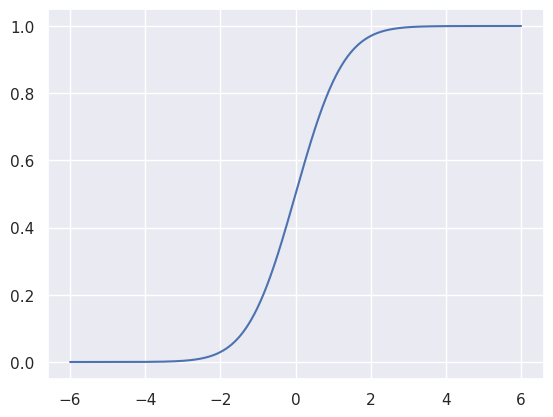

In [287]:
t = np.linspace(-6, 6, 10_000)
x = stats.t.cdf(t, 20)
plt.plot(t, x)


### Question 10:

- Consider only the communities from the state of California (CA). Make a linear regression model for the variables:  
  $x:$ `autoTheftPerPop`  
  $y:$ `robbbPerPop`

- What percentage of variability in the response is explained by the model?
- What is the increment in `robbPerPop` for each unit increment in `autoTheftPerPop`?
- Make a scatter plot of these two variables along with the regression line.
- What is the predicted `robbPerPop` in a community with `autoTheftPerPop = 800`
- What is the first residual of the model (the residual for the first observation)?

**Answer:**


The intercept is -4.813, and  the coefficients are [0.3395]
The r_squared is: 0.6048 
The prediction for x=[[800]] is y=[[266.80520814]]


/home/perezs/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/perezs/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


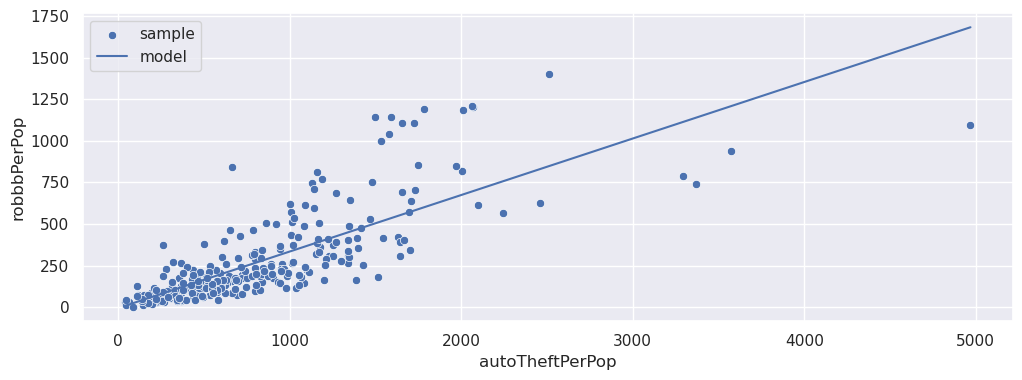

In [336]:
from sklearn.linear_model import LinearRegression

# Construct the x, y DataFrames
california = crimes[crimes["state"] == "CA"]
X, y = california[["autoTheftPerPop"]], california[["robbbPerPop"]]

# Construct an instance of LinearRegression, fit it to the data
linear_reg = LinearRegression()
linear_reg.fit(X, y)

# Print its parameters
print(
    f"The intercept is {linear_reg.intercept_.round(4)[0]}, and  the coefficients are {linear_reg.coef_[0].round(4)}"
)

# Get r_squared: GOF statistic that measures the proportion of variability in the sample that is explained by the model
r_squared = linear_reg.score(X, y)
print(f"The r_squared is: {round(r_squared, 4)} ")

# Plots
figure, axis = plt.subplots(1, 1, figsize=(12, 4))
# Scatter plot of the sample
sns.scatterplot(x=X["autoTheftPerPop"], y=y["robbbPerPop"], label="sample")
# Line plot of the model
x_uniform_range = np.linspace(X["autoTheftPerPop"].min(), X["autoTheftPerPop"].max())
y_model = linear_reg.predict(x_uniform_range.reshape(-1, 1)).reshape(1, -1)[0]
sns.lineplot(x=x_uniform_range, y=y_model, label="model")

# Predict a new x
x_new = [[800]]
y_hat = linear_reg.predict(x_new)
print(f"The prediction for x={x_new} is y={y_hat}")